<a href="https://colab.research.google.com/github/Fatemeh-Rahmani/cancer-prediction_Breast-Cancer-Wisconsin-Diagnostic-/blob/main/cancer_prediction_Breast_Cancer_Wisconsin_(Diagnostic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
sys.path.append('/content/drive/My Drive/Filoger/Medical Image Analysis/')

In [3]:
!pip install --upgrade xgboost
!pip install scikit-learn==1.2.2

In [4]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV


In [5]:
path = "/content/drive/My Drive/Filoger/Medical Image Analysis/breast+cancer+wisconsin+diagnostic/wdbc.data"
columns = [
    'ID', 'Diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
    'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
    'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
    'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]
data = pd.read_csv(path, header=None, names=columns)

In [6]:
data.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
print(data.columns)

Index(['ID', 'Diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [8]:
data = data.drop(['ID'],axis = 1)

In [9]:
print(data.columns)

Index(['Diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [10]:
data['Diagnosis'].dtype

dtype('O')

In [11]:
numerical_columns = data.select_dtypes(include=[ 'float64','int32']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

In [12]:
for col in numerical_columns:
    data[col] = data[col].fillna(data[col].mean())

In [13]:
data[categorical_columns] = data[categorical_columns].replace(['Missing', 'not applicable', 'not available'] , 'Unknown')
data[categorical_columns] = data[categorical_columns].fillna('Unknown')

In [14]:
for col in categorical_columns:
    data[col] = data[col].astype(str)

In [15]:
numerical_columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [16]:
categorical_columns

Index(['Diagnosis'], dtype='object')

In [17]:
# Encode categorical data
label_encoders = {}  # Dictionary to store LabelEncoders for each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store the encoder for later use

In [18]:
# Define the target column
target_column = 'Diagnosis'  # Update this with the actual target column name if it's different

# Separate features (X) and labels (y)
X = data.drop(columns=[target_column])  # All columns except the target column
y = data[target_column]  # The target column

# Display shapes for verification
print("Features shape:", X.shape)
print("Labels shape:", y.shape)


Features shape: (569, 30)
Labels shape: (569,)


In [19]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)


# plot percentage of data

In [20]:
# plot percentage of data
trace = go.Pie(labels = ['benign','malignant'], values = data['Diagnosis'].value_counts(),
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['green', 'red'],
                           line=dict(width=1.5)))


layout = dict(title =  'Distribution of Diagnosis variable')

fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [21]:
# Standardize numerical columns
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [22]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the size of the training and testing sets
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (455, 30)
Testing set size: (114, 30)



Training and evaluating: Logistic Regression
Accuracy: 0.9912
Precision: 0.9913
Recall: 0.9912
F1 Score: 0.9912


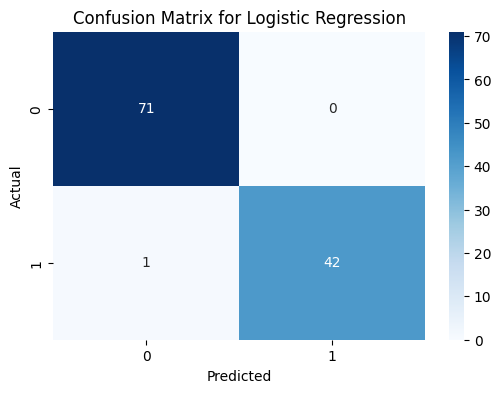


Training and evaluating: metLearn
Accuracy: 0.9825
Precision: 0.9825
Recall: 0.9825
F1 Score: 0.9825


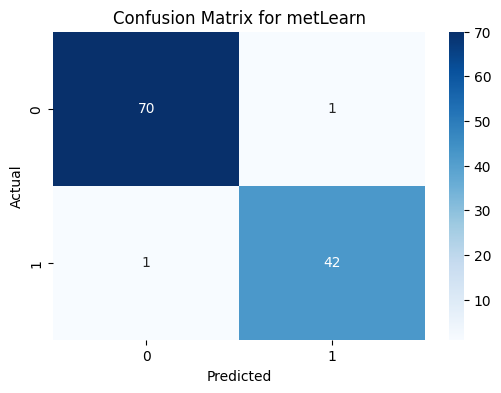


Training and evaluating: MLP
Accuracy: 0.9912
Precision: 0.9913
Recall: 0.9912
F1 Score: 0.9912


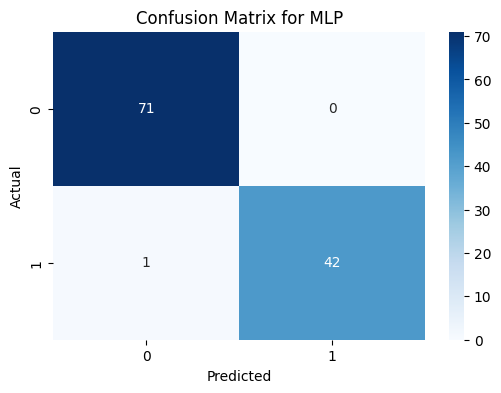

In [23]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200, solver='liblinear', C=0.1, random_state=42),

    "metLearn" : CalibratedClassifierCV(XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1,
                                                      subsample=0.2, colsample_bytree=0.2, random_state=42), method='sigmoid', cv=2),

    "MLP": MLPClassifier(hidden_layer_sizes=(10,), learning_rate='adaptive', learning_rate_init=0.001,
                         activation='logistic', solver='adam', max_iter=500, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining and evaluating: {name}")

    # Train the model

    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Display metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


# Extract features importance for 3 models

Top Features by Importance (Logistic Regression):
                Feature  Importance
21        texture_worst    0.583456
20         radius_worst    0.493864
10            radius_se    0.490999
7   concave_points_mean    0.472338
23           area_worst    0.471812


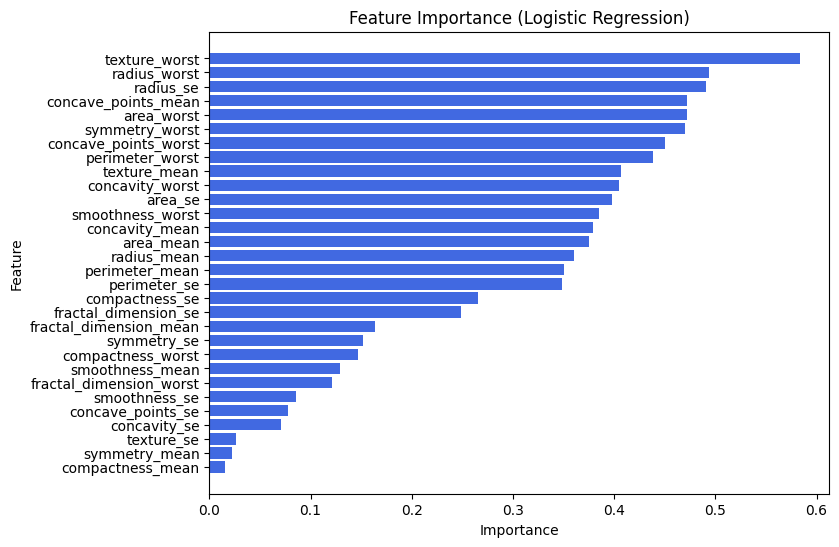

In [24]:
# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=200, solver='liblinear', C=0.1)
log_reg.fit(X_train, y_train)

# Extract feature importance (coefficients)
feature_importance = np.abs(log_reg.coef_[0])
feature_names = X.columns

importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Display the top features
print("Top Features by Importance (Logistic Regression):")
print(importances_df.head())

# Visualize feature importance
plt.figure(figsize=(8, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='royalblue')
plt.gca().invert_yaxis()
plt.title('Feature Importance (Logistic Regression)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Top Features by Importance (XGBClassifier):
                 Feature  Importance
7    concave_points_mean    0.136776
27  concave_points_worst    0.099356
20          radius_worst    0.086845
22       perimeter_worst    0.082886
21         texture_worst    0.057418


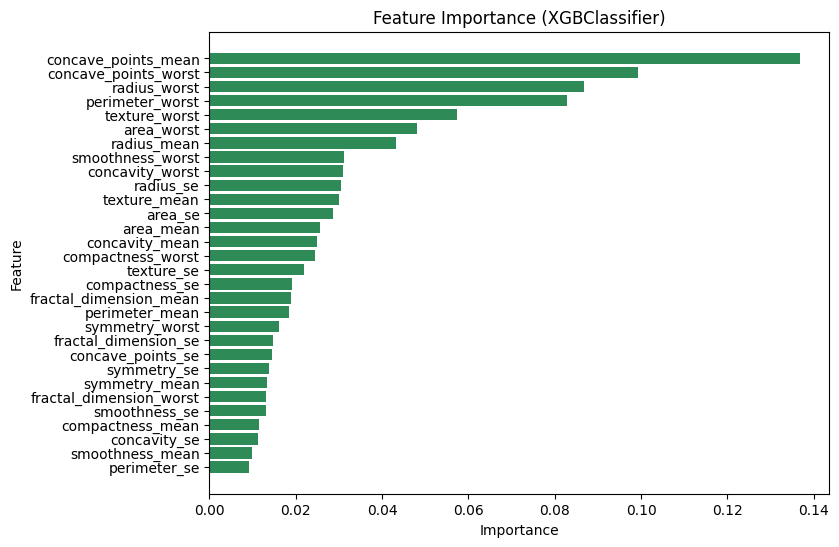

In [25]:
# Train XGBClassifier
xgb_model = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1,
                          subsample=0.2, colsample_bytree=0.2, random_state=42)
xgb_model.fit(X_train, y_train)

# Extract feature importance
xgb_feature_importance = xgb_model.feature_importances_

xgb_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_feature_importance
}).sort_values(by='Importance', ascending=False)

# Display top features for XGBClassifier
print("Top Features by Importance (XGBClassifier):")
print(xgb_importances_df.head())

# Visualize feature importance for XGBClassifier
plt.figure(figsize=(8, 6))
plt.barh(xgb_importances_df['Feature'], xgb_importances_df['Importance'], color='seagreen')
plt.gca().invert_yaxis()
plt.title('Feature Importance (XGBClassifier)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Top Features by Importance (MLPClassifier):
                   Feature  Importance
10               radius_se    0.023684
9   fractal_dimension_mean    0.020175
15          compactness_se    0.018421
28          symmetry_worst    0.018421
20            radius_worst    0.017544


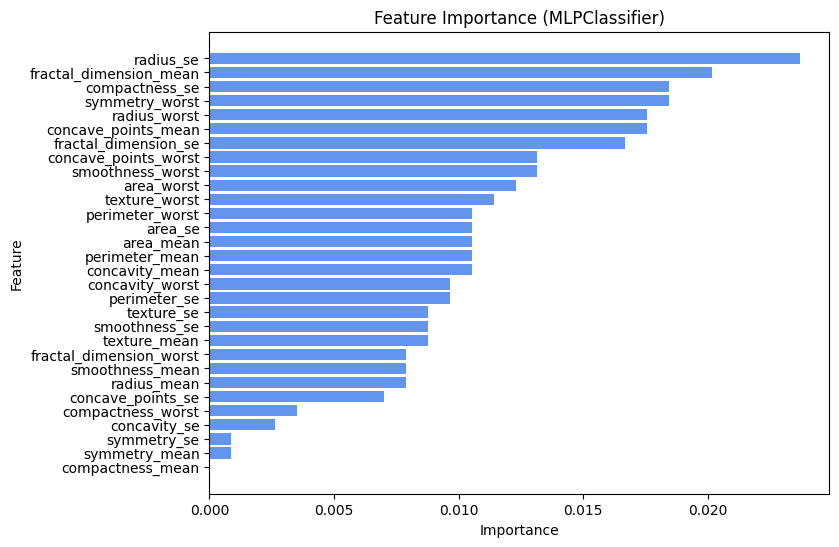

In [26]:
# Train MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(10,), learning_rate='adaptive', learning_rate_init=0.001,
                          activation='logistic', solver='adam', max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Calculate feature importance using permutation importance
mlp_importance = permutation_importance(mlp_model, X_test, y_test, n_repeats=10, random_state=42)
mlp_feature_importance = mlp_importance.importances_mean

mlp_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': mlp_feature_importance
}).sort_values(by='Importance', ascending=False)

# Display top features for MLP
print("Top Features by Importance (MLPClassifier):")
print(mlp_importances_df.head())

# Visualize feature importance for MLP
plt.figure(figsize=(8, 6))
plt.barh(mlp_importances_df['Feature'], mlp_importances_df['Importance'], color='cornflowerblue')
plt.gca().invert_yaxis()
plt.title('Feature Importance (MLPClassifier)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



# correlation between features

In [27]:
#correlation
correlation = data.corr()
matrix_cols = correlation.columns.tolist()
corr_array  = np.array(correlation)
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   xgap = 2,
                   ygap = 2,
                   colorscale='Viridis',
                   colorbar   = dict() ,
                  )
layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210, t = 25,b = 210),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9)),
                       )
                  )
fig = go.Figure(data = [trace],layout = layout)
py.iplot(fig)

In [28]:
# Calculate the correlation matrix
correlation = data.corr()

corr_pairs = correlation.stack().reset_index()
corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Remove duplicate pairs and self-correlations
corr_pairs = corr_pairs[corr_pairs['Feature1'] != corr_pairs['Feature2']]

# Sort correlations
corr_sorted = corr_pairs.sort_values(by='Correlation', ascending=False).reset_index(drop=True)

most_corr = corr_sorted.iloc[0]  # maximum
least_corr = corr_sorted.iloc[-1]  # Minimum

print("maximum correlation")
print(most_corr)

print("Minimum Correlation")
print(least_corr)

print("All Correlations:")
print(corr_sorted)

# 10 maximum correlations
top_10_max_corr = corr_sorted.head(10)
print("Top 10 Maximum Correlations (Positive):")
print(top_10_max_corr)

# 10 minimum correlations
top_10_min_corr = corr_sorted.tail(10).sort_values(by='Correlation').reset_index(drop=True)
print("\nTop 10 Minimum Correlations (Negative):")
print(top_10_min_corr)


maximum correlation
Feature1          radius_mean
Feature2       perimeter_mean
Correlation          0.997855
Name: 0, dtype: object
Minimum Correlation
Feature1       fractal_dimension_mean
Feature2                  radius_mean
Correlation                 -0.311631
Name: 929, dtype: object
All Correlations:
                   Feature1                Feature2  Correlation
0               radius_mean          perimeter_mean     0.997855
1            perimeter_mean             radius_mean     0.997855
2              radius_worst         perimeter_worst     0.993708
3           perimeter_worst            radius_worst     0.993708
4                 area_mean             radius_mean     0.987357
..                      ...                     ...          ...
925          perimeter_mean  fractal_dimension_mean    -0.261477
926  fractal_dimension_mean               area_mean    -0.283110
927               area_mean  fractal_dimension_mean    -0.283110
928             radius_mean  fractal_dim

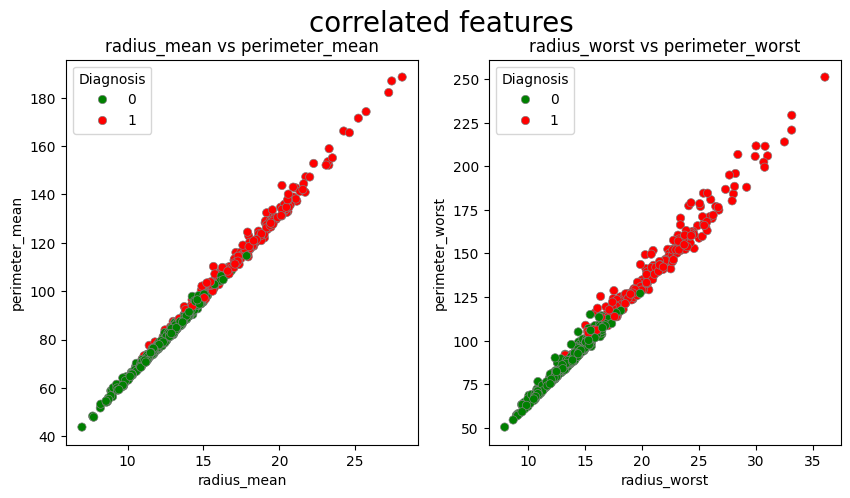

In [29]:
# seaborn version :
palette ={0 : 'green', 1 : 'red'}
edgecolor = 'grey'

fig = plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
ax1 = sns.scatterplot(x = data['radius_mean'], y = data['perimeter_mean'], hue=data['Diagnosis'],
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('radius_mean vs perimeter_mean')

plt.subplot(1, 2, 2)
ax2 = sns.scatterplot(x = data['radius_worst'], y = data['perimeter_worst'], hue=data['Diagnosis'],
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('radius_worst vs perimeter_worst')


fig.suptitle('correlated features', fontsize = 20)
plt.savefig('2')
plt.show()

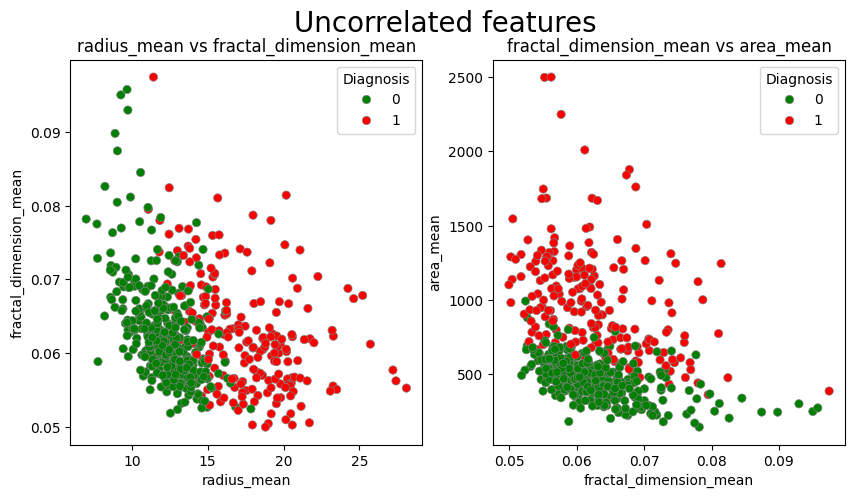

In [30]:
# seaborn version :
palette ={0 : 'green', 1 : 'red'}
edgecolor = 'grey'

fig = plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
ax3 = sns.scatterplot(x = data['radius_mean'], y = data['fractal_dimension_mean'], hue=data['Diagnosis'],
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('radius_mean vs fractal_dimension_mean')

plt.subplot(1, 2, 2)
ax4 = sns.scatterplot(x = data['fractal_dimension_mean'], y = data['area_mean'], hue=data['Diagnosis'],
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('fractal_dimension_mean vs area_mean')

fig.suptitle('Uncorrelated features', fontsize = 20)
plt.savefig('2')
plt.show()